 **COVID-19: Cases, Vaccinations, Deaths 🦠💉**

 **Motivation**- Special thanks to Smartknower team for giving us this amazing Data Science project on analysing, forcasting and visualizing the Covid-19 dataset.

 **Data Source**- Our World in Data (https://ourworldindata.org/ - https://github.com/owid/covid-19-data/tree/master/public/data).
Thanks to Our World in Data for making available such a complete, clean, updated and reliable data as they are doing with such an important topic.

## Contents <hr>
<ol>
     <b><li>Importing important libraries</li></b>

  <b><li>Preprocessing</li></b>
    <ol>
       <li>Checking for null values.</li>
       <li>Creating a new dataframe.</li>
       <li>Selecting major countries for analysis.</li>
    </ol>
  **<li>Visualizing</li>**
    <ol>
       <li>Covid-19 Cases</li>
       <li>Vaccinations</li>
       <li>Covid-19 Deaths</li>
    </ol>
  
  **<li>Country wise analysis/ Questions</li>**
     <ol> 
           <li>India</li>
           <li>United states</li>
           <li>China</li>
           <li>Brazil</li>
        </ol>
          <ul>
             <li>Questions Answered of -</li>
              <ol>
                 <li>Country with Most/least Cases? </li>
                 <li>Country Most/least Deaths?</li>
                <li>Country Most/least Vaccinations?</li>
              </ol>
          </ul>    
                 
  **<li>Forecasting</li>**
    <ul>
      <li> India </li>
          <ol>
            <li>Upcoming Cases</li>
            <li>Upcoming Deaths</li>
            <li>Upcoming Vaccinations</li>
            <li>What's the sum for cases/deaths/vaccinations in India for July month?</li>
          </ol>
      <li> United states </li>
            <ol>
            <li>Upcoming Cases</li>
            <li>Upcoming Deaths</li>
            <li>Upcoming Vaccinations</li>
            <li>What's the sum for cases/deaths/vaccinations in U.S. for July month?</li>
          </ol>  
   
</ol>

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)
import seaborn as sns
%matplotlib inline
df1= pd.read_csv('/content/owid-covid-data.csv')
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [22]:
df1.shape # Checking for rows and columns.

(100191, 60)

In [23]:
df1.info() # For information regarding our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100191 entries, 0 to 100190
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               100191 non-null  object 
 1   continent                              95495 non-null   object 
 2   location                               100191 non-null  object 
 3   date                                   100191 non-null  object 
 4   total_cases                            96584 non-null   float64
 5   new_cases                              96581 non-null   float64
 6   new_cases_smoothed                     95571 non-null   float64
 7   total_deaths                           86431 non-null   float64
 8   new_deaths                             86587 non-null   float64
 9   new_deaths_smoothed                    95571 non-null   float64
 10  total_cases_per_million                96070 non-null   

**As we can see, we a lot of columns it's better to extract only important columns.**

In [24]:
#Changing date-"object" to "datetime.date"
df1['date']=pd.to_datetime(df1['date']).dt.date
min(df1.date) #Starting date on dataset

datetime.date(2020, 1, 1)

In [25]:
max(df1.date)# Last date for analysis in dataset

datetime.date(2021, 7, 5)

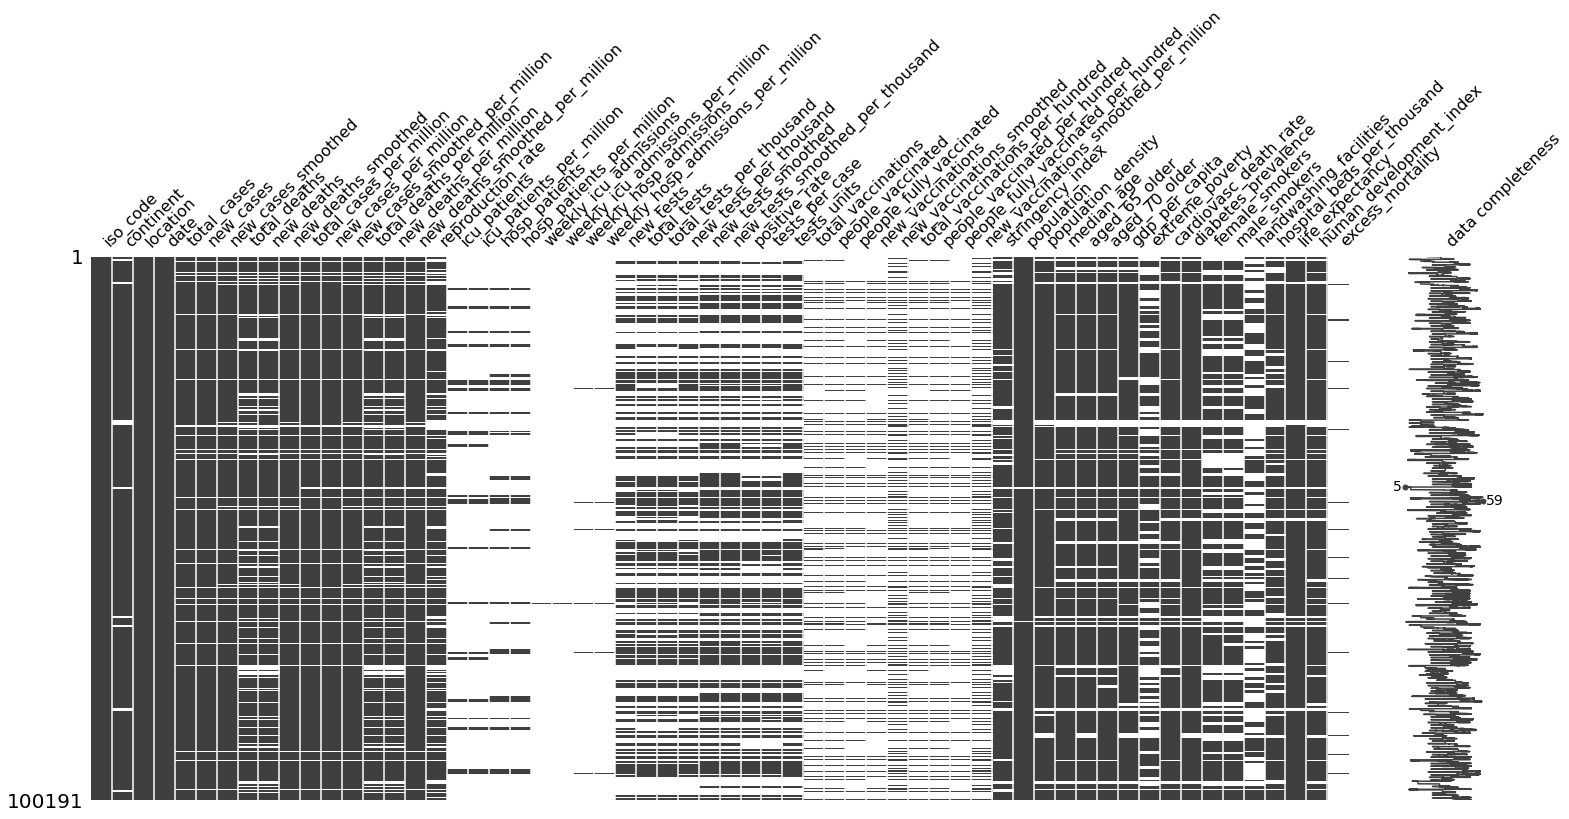

In [26]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df1,labels=True);
# For visualizing null values

**Creating a new dataset, for columns we found convenient.**

In [27]:
# Which country/state is having highest number of cases?
# Which country/state is having lowest number of cases?
# Which country/state is having lowest number of deaths?
# Which country/state is having highest number of deaths?
# Which country/state is most vaccinated?

In [28]:
#Taking columns that seems important for now, and important for answering questions.
new1 = ['location','date','total_cases','new_cases','new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million',
        'new_deaths_per_million','new_tests','total_tests','positive_rate','total_vaccinations','people_vaccinated','people_fully_vaccinated',
        'new_vaccinations','new_vaccinations_smoothed','population','population_density','gdp_per_capita','extreme_poverty']
df2 = df1[new1].drop_duplicates().reset_index(drop=True)
df2.head(3)

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,Afghanistan,2020-02-24,1.0,1.0,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,1803.987,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,1803.987,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,1803.987,NaN


In [29]:
df2.shape #Change in columns 

(100191, 21)

In [30]:
df2['date']=pd.to_datetime(df2['date']).dt.date
min(df2.date)

datetime.date(2020, 1, 1)

**Extracting major countries for analysis**

In [31]:
df2.set_index("location", inplace = True)
df2 = df2.loc[["India", "Australia","Brazil","China","Japan","United States","Italy"]]
df2 

,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
location,,,,,,,,,,,,,,,,,,,,
India,2020-01-30,1.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-01-31,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-02-01,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-02-02,2.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
India,2020-02-03,3.0,1.0,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Italy,2021-06-30,4259909.0,776.0,24.0,70456.173,12.835,2109.860,0.397,185016.0,71583206.0,0.004,51621746.0,34072499.0,18781312.0,556131.0,544999.0,6.046183e+07,205.859,35220.084,2.0
Italy,2021-07-01,4260788.0,879.0,21.0,70470.711,14.538,2110.207,0.347,188474.0,71771680.0,0.004,52171922.0,34280736.0,19128204.0,550176.0,538089.0,6.046183e+07,205.859,35220.084,2.0
Italy,2021-07-02,4261582.0,794.0,28.0,70483.843,13.132,2110.671,0.463,NaN,NaN,NaN,52706369.0,34467193.0,19480315.0,534447.0,528158.0,6.046183e+07,205.859,35220.084,2.0


In [32]:
df2.shape # for rows and columns

(3654, 20)

In [33]:
df2=df2.reset_index()
df2 # our new dataframe is ready

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,India,2020-01-30,1.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
1,India,2020-01-31,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
2,India,2020-02-01,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
3,India,2020-02-02,2.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
4,India,2020-02-03,3.0,1.0,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,Italy,2021-06-30,4259909.0,776.0,24.0,70456.173,12.835,2109.860,0.397,185016.0,71583206.0,0.004,51621746.0,34072499.0,18781312.0,556131.0,544999.0,6.046183e+07,205.859,35220.084,2.0
3650,Italy,2021-07-01,4260788.0,879.0,21.0,70470.711,14.538,2110.207,0.347,188474.0,71771680.0,0.004,52171922.0,34280736.0,19128204.0,550176.0,538089.0,6.046183e+07,205.859,35220.084,2.0
3651,Italy,2021-07-02,4261582.0,794.0,28.0,70483.843,13.132,2110.671,0.463,NaN,NaN,NaN,52706369.0,34467193.0,19480315.0,534447.0,528158.0,6.046183e+07,205.859,35220.084,2.0
3652,Italy,2021-07-03,4262511.0,929.0,22.0,70499.208,15.365,2111.034,0.364,NaN,NaN,NaN,53211789.0,34622739.0,19832783.0,505420.0,522867.0,6.046183e+07,205.859,35220.084,2.0


# Visualizing<hr>
* Visualizing the past trends of major countries for covid-19.
* Will mainly use seaborn library for this.

Text(0.5, 1.0, 'Covid-19 Cases')

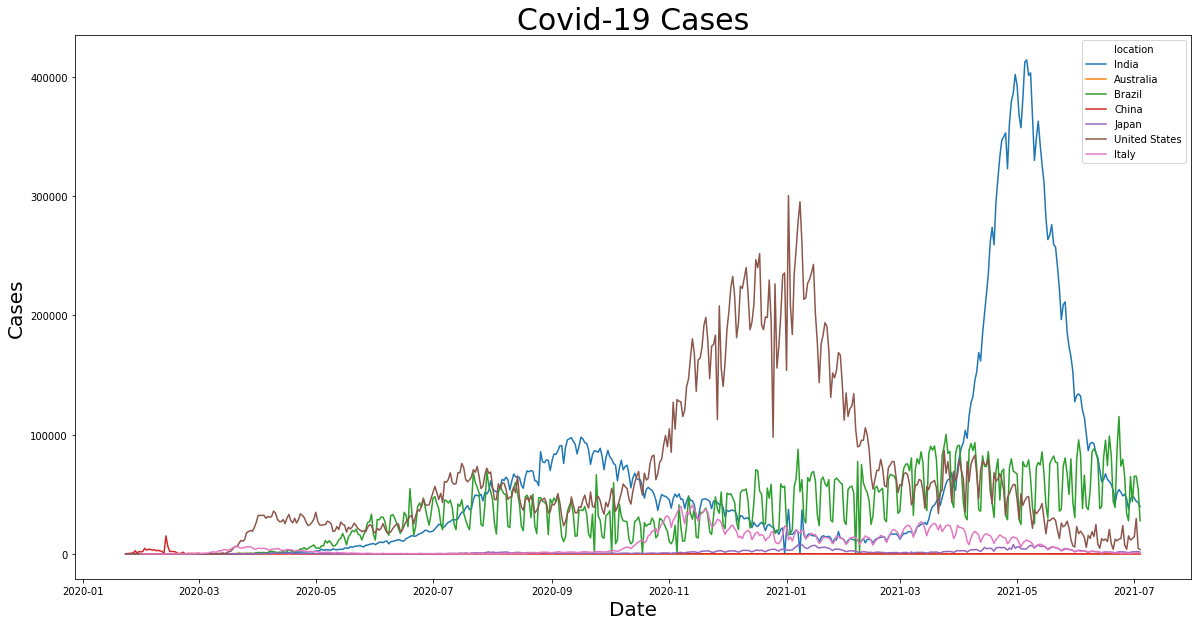

In [34]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="date", y="new_cases",hue="location", data=df2);
plt.xlabel("Date", size=20)
plt.ylabel("Cases", size=20)
plt.title("Covid-19 Cases", size=30)

Text(0.5, 1.0, 'Vaccinations')

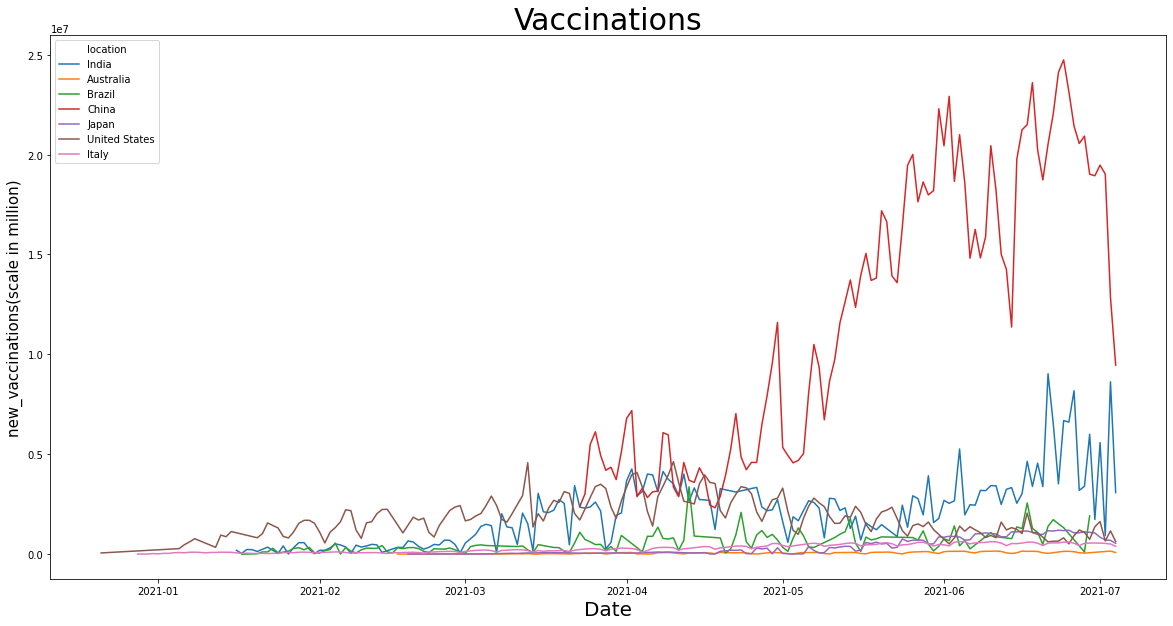

In [35]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="date", y="new_vaccinations",hue="location", data=df2);
plt.xlabel("Date", size=20)
plt.ylabel("new_vaccinations(scale in million)", size=15)
plt.title("Vaccinations", size=30)

Text(0.5, 1.0, 'Covid-19 Deaths')

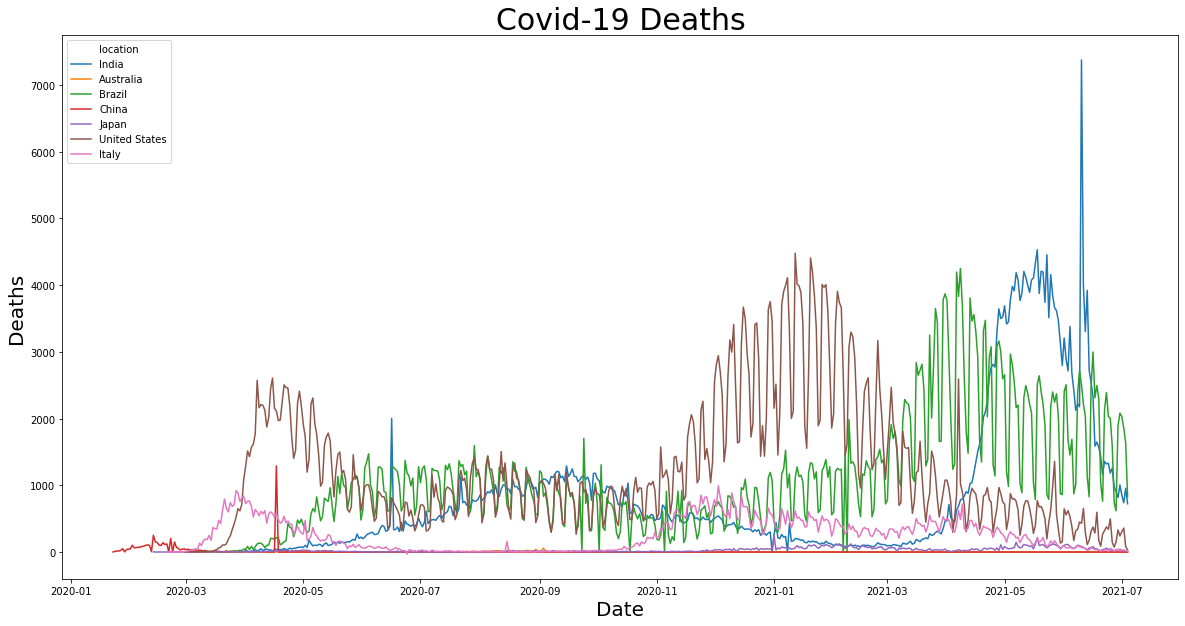

In [36]:
#Visualizing for Deaths
plt.figure(figsize=(20, 10))
sns.lineplot(x="date", y="new_deaths",hue="location", data=df2);
plt.xlabel("Date", size=20)
plt.ylabel("Deaths", size=20)
plt.title("Covid-19 Deaths", size=30)

# Country wise Analysis / Questions <hr>

**India**
* Creating a dataframe for information regarding India.

In [37]:
df3 = df2.copy()
df3.set_index("location", inplace = True)
dfIndia = df3.loc[["India"]]
dfIndia=dfIndia.reset_index()
dfIndia.head(2)

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,India,2020-01-30,1.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
1,India,2020-01-31,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2


In [38]:
In_cases = dfIndia.new_cases.sum()
In_deaths = dfIndia.new_deaths.sum()
In_vaccinations = dfIndia.new_vaccinations.sum()
print('Current acumulated Indian figures:')
print('Cases:\t\t',f'{int(In_cases):,}')
print('Deaths:\t\t',f'{int(In_deaths):,}')
print('Vaccinations:\t',f'{int(In_vaccinations):,}')

Current acumulated Indian figures:
Cases:		 30,585,229
Deaths:		 402,728
Vaccinations:	 335,011,064


**United states**
* Creating a dataframe for information regarding United states.

In [39]:
df4 = df2.copy()
df4.set_index("location", inplace = True)
dfUSA = df4.loc[["United States"]]
dfUSA=dfUSA.reset_index()
dfUSA.head(2)

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,United States,2020-01-22,1.0,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,54225.446,1.2
1,United States,2020-01-23,1.0,0.0,NaN,0.003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,54225.446,1.2


In [40]:
dfUSA.shape

(530, 21)

In [41]:
USA_cases = dfUSA.new_cases.sum()
USA_deaths = dfUSA.new_deaths.sum()
USA_vaccinations = dfUSA.new_vaccinations.sum()
print('Current acumulated Indian figures:')
print('Cases:\t\t',f'{int(USA_cases):,}')
print('Deaths:\t\t',f'{int(USA_deaths):,}')
print('Vaccinations:\t',f'{int(USA_vaccinations):,}')

Current acumulated Indian figures:
Cases:		 33,717,566
Deaths:		 605,526
Vaccinations:	 316,560,005


**China**
* Creating a dataframe for information regarding China.

In [42]:
df5 = df2.copy()
df5.set_index("location", inplace = True)
dfCH = df5.loc[["China"]]
dfCH=dfCH.reset_index()
dfCH.head(2)

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,China,2020-01-22,548.0,NaN,NaN,0.381,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,15308.712,0.7
1,China,2020-01-23,641.0,93.0,1.0,0.445,0.065,0.013,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,15308.712,0.7


In [43]:
CH_cases = dfCH.new_cases.sum()
CH_deaths = dfCH.new_deaths.sum()
CH_vaccinations = dfCH.new_vaccinations.sum()
print('Current acumulated Indian figures:')
print('Cases:\t\t',f'{int(CH_cases):,}')
print('Deaths:\t\t',f'{int(CH_deaths):,}')
print('Vaccinations:\t',f'{int(CH_vaccinations):,}')

Current acumulated Indian figures:
Cases:		 91,376
Deaths:		 4,619
Vaccinations:	 1,225,039,000


**Brazil**
* Creating a dataframe for information regarding Brazil.

In [44]:
df6 = df2.copy()
df6.set_index("location", inplace = True)
dfBR = df5.loc[["Brazil"]]
dfBR=dfBR.reset_index()
dfBR.head(2)

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,Brazil,2020-02-26,1.0,1.0,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,14103.452,3.4
1,Brazil,2020-02-27,1.0,0.0,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,14103.452,3.4


In [45]:
BR_cases = dfBR.new_cases.sum()
BR_deaths = dfBR.new_deaths.sum()
BR_vaccinations = dfBR.new_vaccinations.sum()
print('Current acumulated Brazil figures:')
print('Cases:\t\t',f'{int(BR_cases):,}')
print('Deaths:\t\t',f'{int(BR_deaths):,}')
print('Vaccinations:\t',f'{int(BR_vaccinations):,}')

Current acumulated Brazil figures:
Cases:		 18,769,808
Deaths:		 524,417
Vaccinations:	 78,472,742


**Overview :**<br><hr>
**Current acumulated Indian figures:**
* Cases:		 30,362,848
* Deaths:		 398,454
* Vaccinations:	 315,056,427


**Current acumulated USA figures:**
* Cases:		 33,652,097
* Deaths:		 604,474
* Vaccinations:	 311,108,599


**Current acumulated Brazil figures:**
* Cases:		 18,513,305
* Deaths:		 515,985
* Vaccinations:	 78,472,742

**Current acumulated China figures:**
* Cases:		 91,286
* Deaths:		 4,619
* Vaccinations:	 1,145,274,000

**Questions answering with reference to barplot and overview.**<hr>

Text(0.5, 0, '(In 100 million)')

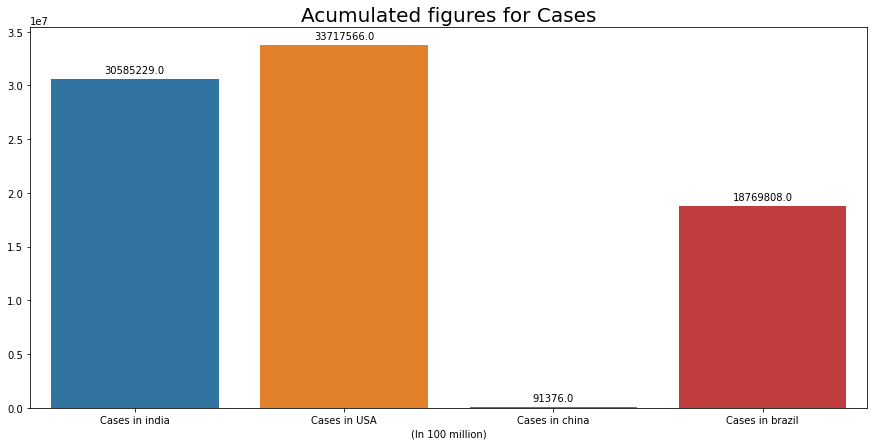

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
splot1=sns.barplot(x=['Cases in india','Cases in USA','Cases in china','Cases in brazil'], y=[In_cases, USA_cases, CH_cases, BR_cases])
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Acumulated figures for Cases", size=20) 
plt.xlabel("(In 100 million)", size=10)           


**Q) Which country is having highest number of cases?**
* As we can see from the above graph(Acumulated figures for Cases) **United States of America** is the country with highest number of covid-19 cases. 
* Cases: 33,652,097

**Q) Which country is having the lowest number of cases?**
* As we can see from the above graph (Acumulated figures for Cases) **China** is the country with highest number of covid-19 cases.
* Cases: 91,286

Text(0.5, 0, '(In Billion)')

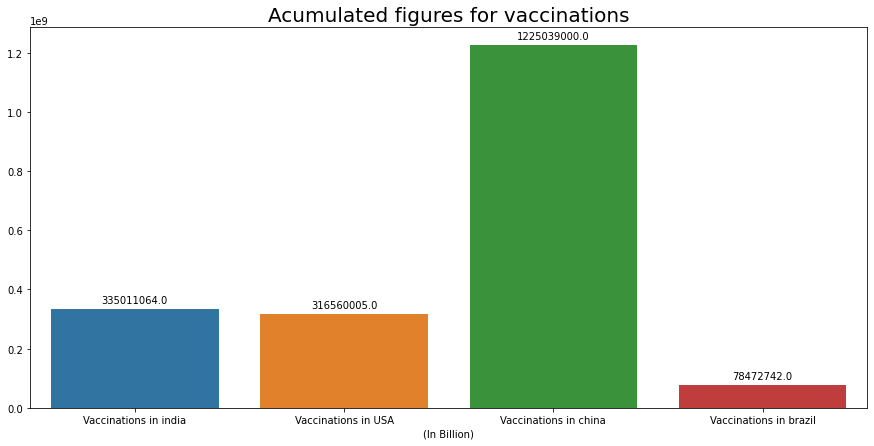

In [47]:
fig, ax = plt.subplots(figsize=(15,7))
splot2=sns.barplot(x=['Vaccinations in india','Vaccinations in USA','Vaccinations in china','Vaccinations in brazil'],
            y=[In_vaccinations, USA_vaccinations, CH_vaccinations, BR_vaccinations])
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Acumulated figures for vaccinations", size=20)
plt.xlabel("(In Billion)", size=10) 

**Q) Which country is the most vaccinated?**
* As we can see from the above graph(Acumulated figures for vacinations) **China** is the country with highest number of Vaccinations.
* Vaccinations: 1,145,274,000 

**Q) Which country is the least vaccinated?**
* As we can see from the above graph(Acumulated figures for vacinations) **Brazil** is the country with lowest number of Vaccinations.
* Vaccinations: 78,472,742

Text(0.5, 1.0, 'Acumulated figures for deaths')

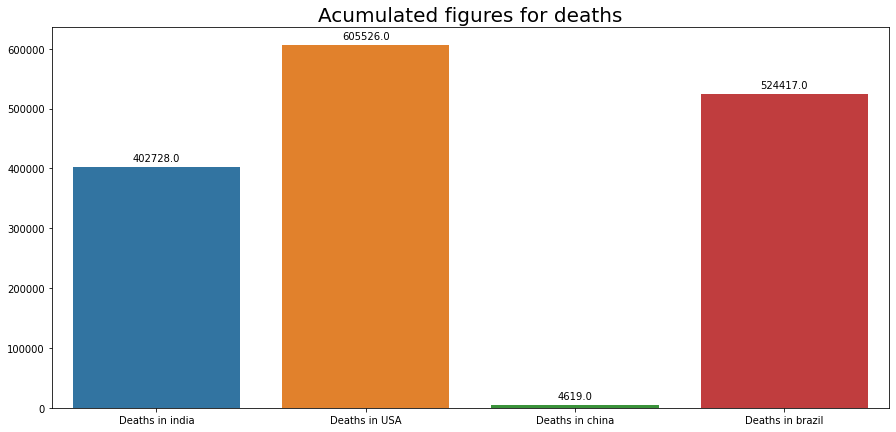

In [48]:
fig, ax = plt.subplots(figsize=(15,7))
splot3=sns.barplot(x=['Deaths in india','Deaths in USA','Deaths in china','Deaths in brazil'], y=[In_deaths, USA_deaths, CH_deaths, BR_deaths])
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Acumulated figures for deaths", size=20)

**Q) Which country has shown most number of deaths?**
* As we can see from the above graph(Acumulated figures for deaths) **United states** is the country with highest number of Deaths.
* Deaths: 604,474

**Q) Which country has shown least number of deaths?**
* As we can see from the above graph(Acumulated figures for deaths) **China** is the country with lowest number of Deaths.
* Deaths: 4,619<hr>

# Forecasting <hr>
* It was observed that the countries need to have limiting upper and lower values otherwise predictions tend to go negative while approaching flatness. Hence, the dataset at necessary points are given tentative floor and cap values on the required points.
* Another point to keep in mind is that the dataset for training of the Prophet model is taken from March 2021 so as to get accurate fitting of data and feasible prediction.

**Forecasting for India**

In [49]:
dfI = dfIndia.copy()
dfI.head(2)

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
0,India,2020-01-30,1.0,1.0,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2
1,India,2020-01-31,1.0,0.0,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,6426.674,21.2


In [50]:
dfI=dfI.dropna()

In [51]:
dfI1=dfI[['date','new_deaths']]
dfI1['date']=pd.to_datetime(dfI1['date'])
dfI1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 380 to 518
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        124 non-null    datetime64[ns]
 1   new_deaths  124 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y,floor,cap
380,2021-02-13,92.0,0,6000
383,2021-02-16,100.0,0,6000


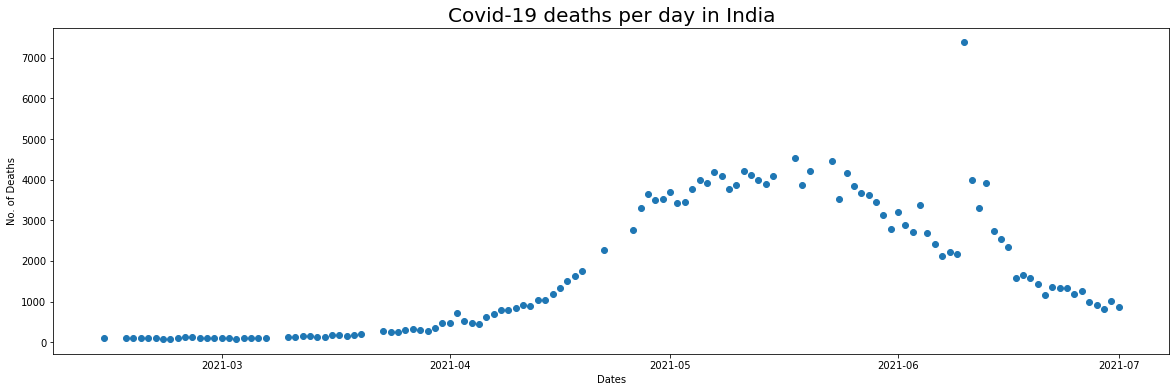

In [52]:
import matplotlib.pyplot as plt
dfI1=dfI1.rename(columns={dfI1.columns[0]:'ds', dfI1.columns[1]:'y'})
plt.figure(figsize=(20,6))
plt.scatter(dfI1['ds'], dfI1['y'])
plt.title('Covid-19 deaths per day in India', size=20)
plt.xlabel('Dates')
plt.ylabel('No. of Deaths')
dfI1['floor']=0                                     #here floor value is provided so as to avoid negative value predictions
dfI1['cap']=6000                                    #here cap values are provided because it's necessary for logistic growth
dfI1.head(2)

In [53]:
from fbprophet import Prophet
model= Prophet(changepoint_prior_scale=0.9, growth='logistic')      #growth is kept logistic so that the graph can be consistent along with changing points
model.fit(dfI1)
x= model.make_future_dataframe(periods=30,freq='D')
x['floor']=0                                                  #here floor value is provided so as to avoid negative value predictions
x['cap']=6000                                                 #here cap values are provided because it's necessary for logistic growth
forecast=model.predict(x)
forecast.info()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          154 non-null    datetime64[ns]
 1   trend                       154 non-null    float64       
 2   cap                         154 non-null    int64         
 3   floor                       154 non-null    int64         
 4   yhat_lower                  154 non-null    float64       
 5   yhat_upper                  154 non-null    float64       
 6   trend_lower                 154 non-null    float64       
 7   trend_upper                 154 non-null    float64       
 8   additive_terms              154 non-null    float64       
 9   additive_terms_lower        154 non-null    float64       
 10  additive_terms_upper        154 non-null    float64       
 11  weekly                      154 non-null    float64       

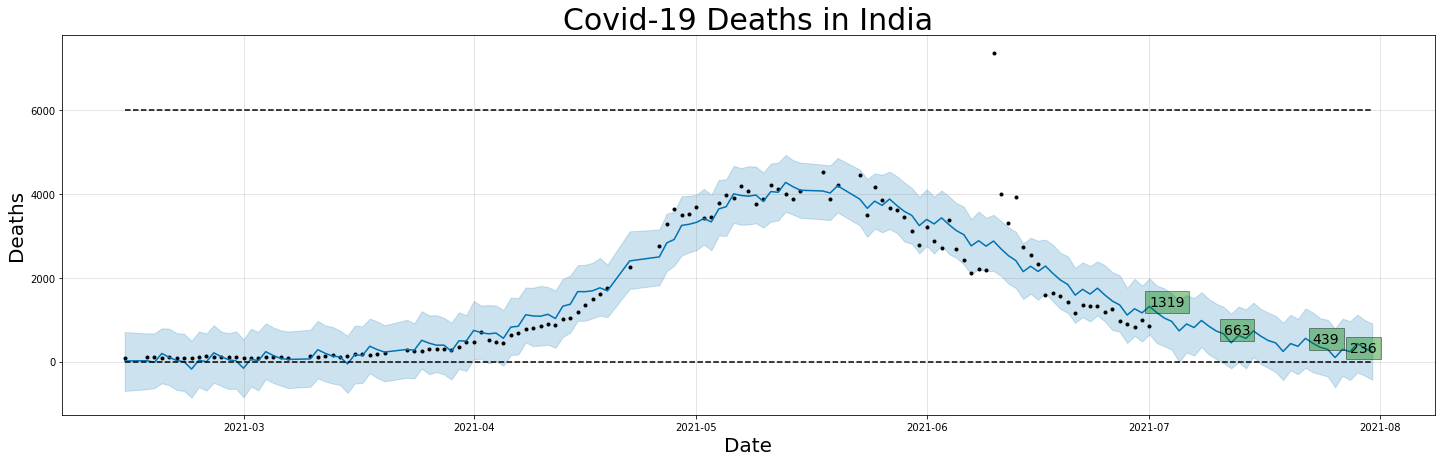

In [54]:
model.plot(forecast,figsize=(20,6));
plt.title("Covid-19 Deaths in India", size=30)
plt.xlabel("Date", size=20)
plt.ylabel("Deaths", size=20)
#Extra lines for number
forecast_plus=forecast.loc[[150,145,133,123]]
for a,b in zip(forecast_plus['ds'], forecast_plus['yhat']):
  plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

In [55]:
deaths=forecast['yhat']
for_deaths=int(deaths[121:150, ].sum())
for_deaths

19572

<b>Q) What will be the total number of deaths due to Covid-19 of the month of July 2021?</b>
<br><u>Ans</u>- According to the prediction of Prophet, the number of deaths will keep declining in the month of July, and the total number of deaths will be: 23746

In [56]:
dfI2=dfI[['date','new_cases']]
dfI2['date']=pd.to_datetime(dfI2['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



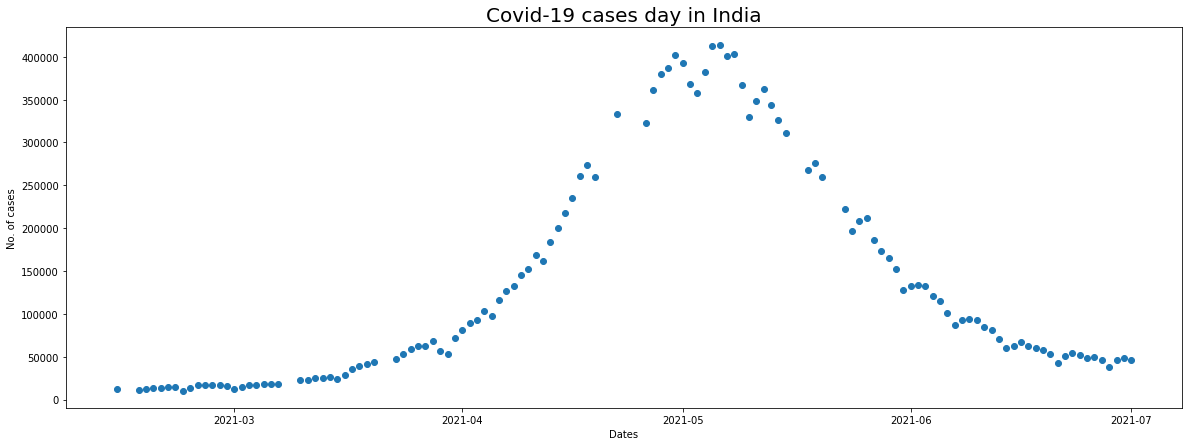

In [57]:
import matplotlib.pyplot as plt
dfI2=dfI2.rename(columns={dfI2.columns[0]:'ds', dfI2.columns[1]:'y'})
plt.figure(figsize=(20,7))
plt.scatter(dfI2['ds'], dfI2['y'])
plt.title('Covid-19 cases day in India', size=20)
plt.xlabel('Dates')
plt.ylabel('No. of cases')
dfI2['floor']=0                              #here floor value is provided so as to avoid negative value predictions
dfI2['cap']=500000  

In [58]:
from fbprophet import Prophet
model2= Prophet(changepoint_prior_scale=0.6, growth='logistic')     #growth is kept logistic so that the graph can be consistent along with changing points
model2.fit(dfI2)
x2= model2.make_future_dataframe(periods=30,freq='D')
x2['floor']=0                                                           #here floor value is provided so as to avoid negative value predictions
x2['cap']=500000                                                        #here cap values are provided because it's necessary for logistic growth
forecast2=model2.predict(x2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


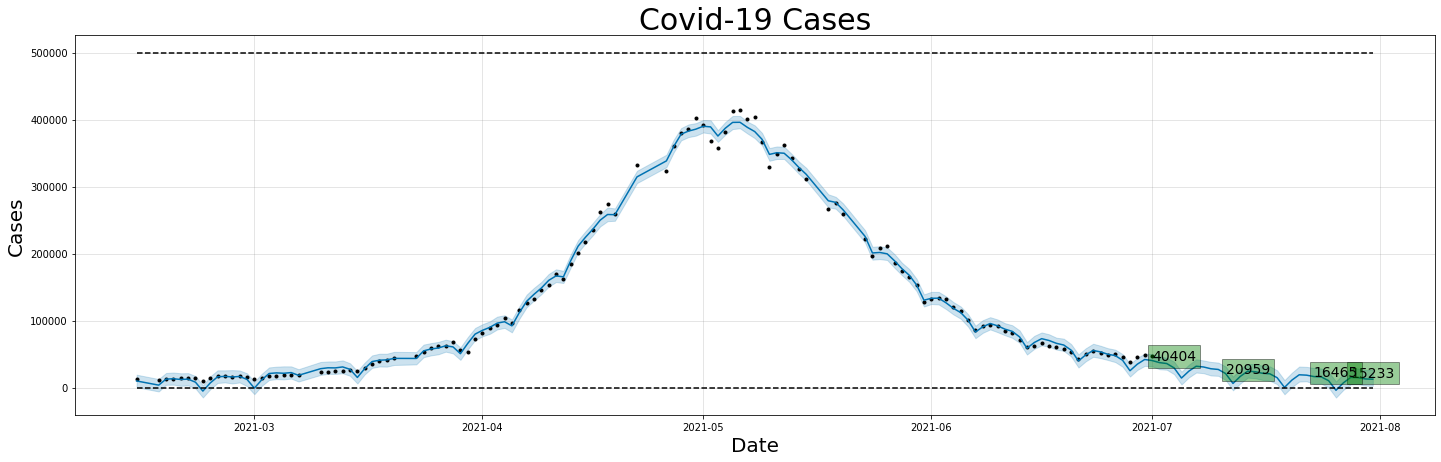

In [59]:
model2.plot(forecast2,figsize=(20,6), xlabel='Dates', ylabel='Covid-19 Cases');
plt.title("Covid-19 Cases", size=30)
plt.xlabel("Date", size=20)
plt.ylabel("Cases", size=20)
#Extra lines for number
forecast_plus2=forecast2.loc[[150,145,133,123]]
for a,b in zip(forecast_plus2['ds'], forecast_plus2['yhat']):
  plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

In [60]:
cases=forecast2['yhat']
for_cases=int(cases[121:150, ].sum())
for_cases

620737

<b>Q) What is the prediction for the total number of new cases that might be noticed in the month of July 2021?</b><br>
<u>Ans-</u> The cases will keep decreasing in number for the month of July, and the total number might be aprroximately: 518324

In [61]:
dfI3=dfI[['date','new_vaccinations']]
dfI3['date']=pd.to_datetime(dfI3['date'])
dfI3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 380 to 518
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              124 non-null    datetime64[ns]
 1   new_vaccinations  124 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



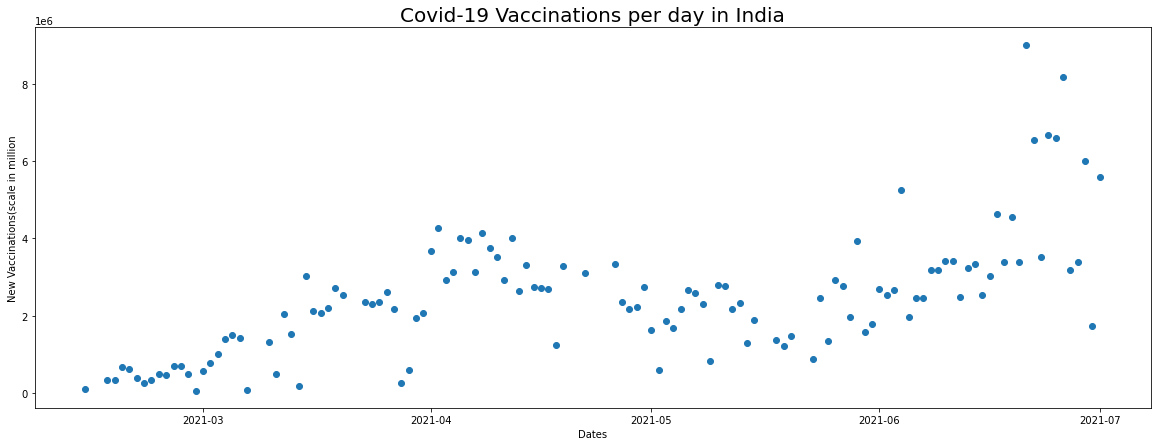

In [62]:
import matplotlib.pyplot as plt
dfI3=dfI3.rename(columns={dfI3.columns[0]:'ds', dfI3.columns[1]:'y'})
plt.figure(figsize=(20,7))
plt.scatter(dfI3['ds'], dfI3['y'])
plt.title('Covid-19 Vaccinations per day in India',size=20)
plt.xlabel('Dates')
plt.ylabel('New Vaccinations(scale in million')
dfI3['floor']=0                                   #here floor value is provided so as to avoid negative value predictions
dfI3['cap']=9000000                               #here cap values are provided because it's necessary for logistic growth

In [63]:
from fbprophet import Prophet
model3= Prophet(changepoint_prior_scale=0.7, growth='logistic') #growth is kept logistic so that the graph can be consistent along with changing points
model3.fit(dfI3)
x3= model3.make_future_dataframe(periods=30,freq='D')
x3['floor']=0                                                   #here floor value is provided so as to avoid negative value predictions
x3['cap']=9000000                                               #here cap values are provided because it's necessary for logistic growth   
forecast3=model3.predict(x3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


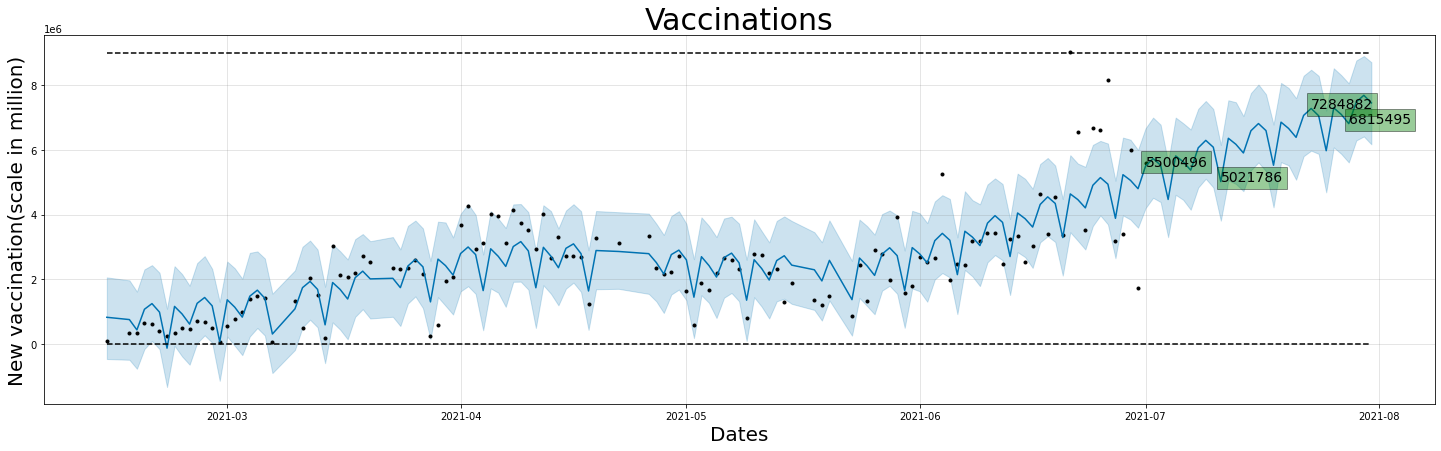

In [64]:
model3.plot(forecast3,figsize=(20,6), xlabel='Dates', ylabel='Vaccines administered');
plt.title("Vaccinations", size=30)
plt.xlabel("Dates", size=20)
plt.ylabel("New vaccination(scale in million)", size=20)
#Extra lines for number
forecast_plus3=forecast3.loc[[150,145,133,123]]
for a,b in zip(forecast_plus3['ds'], forecast_plus3['yhat']):
  plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

In [65]:
vaccines=forecast3['yhat']
for_vaccines=int(vaccines[121:150, ].sum())
for_vaccines

177100113

<b>Q) How many people will be given vaccination shots during the month of July 2021?</b><br>
<u>Ans-</u> The number of vaccinations per day will rise further in the month of July, reaching a total of: 191196759

<b>Forecasting for USA</b>

In [66]:
dfU= dfUSA.copy()
dfU.tail()

,location,date,total_cases,new_cases,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,population,population_density,gdp_per_capita,extreme_poverty
525,United States,2021-06-30,33664970.0,12872.0,240.0,101706.045,38.888,1827.022,0.725,NaN,NaN,NaN,326521526.0,180674739.0,154884686.0,1368679.0,949925.0,331002647.0,35.608,54225.446,1.2
526,United States,2021-07-01,33679433.0,14463.0,305.0,101749.739,43.695,1827.943,0.921,NaN,NaN,NaN,328152304.0,181339416.0,155884601.0,1630778.0,1066443.0,331002647.0,35.608,54225.446,1.2
527,United States,2021-07-02,33709131.0,29698.0,359.0,101839.461,89.721,1829.028,1.085,NaN,NaN,NaN,328809470.0,181650678.0,156255896.0,657166.0,1087156.0,331002647.0,35.608,54225.446,1.2
528,United States,2021-07-03,33713870.0,4739.0,80.0,101853.778,14.317,1829.269,0.242,NaN,NaN,NaN,329970551.0,182109860.0,156982549.0,1161081.0,1121064.0,331002647.0,35.608,54225.446,1.2
529,United States,2021-07-04,33717567.0,3697.0,33.0,101864.947,11.169,1829.369,0.100,NaN,NaN,NaN,330604253.0,182412776.0,157323738.0,633702.0,1039561.0,331002647.0,35.608,54225.446,1.2


In [67]:
dfU1=dfU[['date','new_deaths']]
dfU1['date']=pd.to_datetime(dfU1['date'])
dfU1=dfU1.rename(columns={dfU1.columns[0]:'ds', dfU1.columns[1]:'y'})
dfU1['floor']=0                                                          #here floor value is provided so as to avoid negative value predictions
dfU1['cap']=7000                                                         #here cap values are provided because it's necessary for logistic growth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'No. of Deaths')

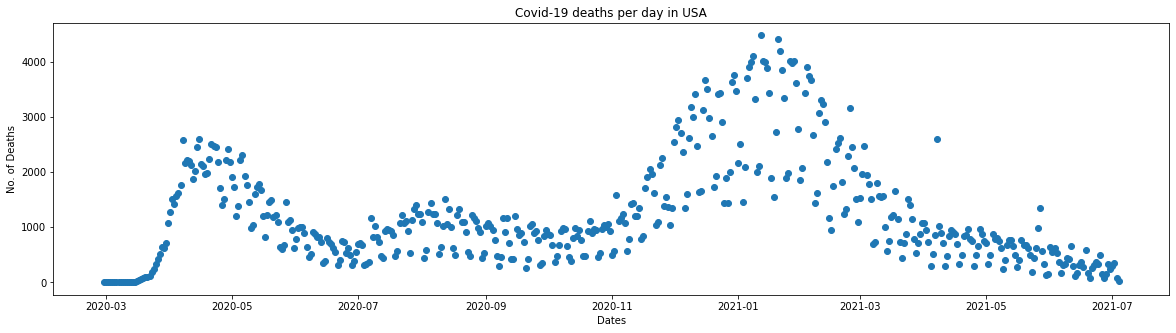

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(dfU1['ds'],dfU1['y'])
plt.title('Covid-19 deaths per day in USA')
plt.xlabel('Dates')
plt.ylabel('No. of Deaths')

In [69]:
from fbprophet import Prophet
modelu1= Prophet(changepoint_prior_scale=0.5, growth='logistic')      #growth is kept logistic so that the graph can be consistent along with changing points
modelu1.fit(dfU1)
x_u1= modelu1.make_future_dataframe(periods=35,freq='D')
x_u1['floor']=0                                                       #here floor value is provided so as to avoid negative value predictions
x_u1['cap']=7000                                                      #here cap values are provided because it's necessary for logistic growth           
forecast_u1=modelu1.predict(x_u1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


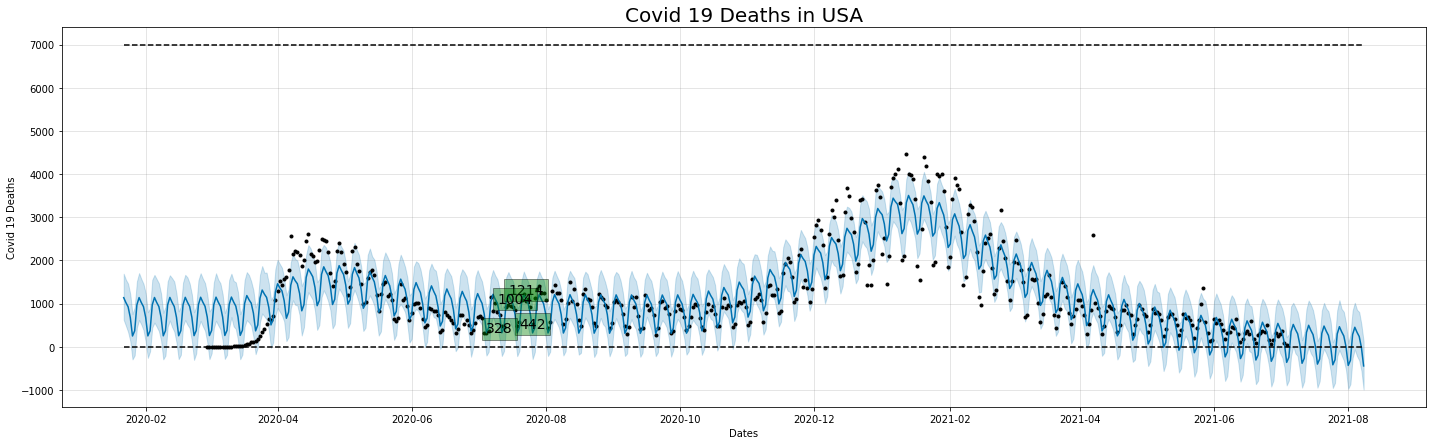

In [70]:
modelu1.plot(forecast_u1,figsize=(20,6), xlabel='Dates', ylabel='Covid 19 Deaths');
plt.title('Covid 19 Deaths in USA', size=20)
#Extra lines for number
forecast_plus_u1=forecast_u1.loc[[180,175,170,165]]
for a,b in zip(forecast_plus_u1['ds'], forecast_plus_u1['yhat']):
  plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

In [71]:
# we made a function rms(root mean square) so that the forecasting sum could be predicted correctly.
# will use rms function to decide forecasting total of july month, for United states.
import math
def rms(x):
  ar=x['yhat']
  ar2=ar[159:189]
  rms=math.sqrt((pow(ar2, 2).sum())/30)
  return int(rms*30)

In [72]:
# For Deaths in July month
rms(forecast_u1)

26862

<b>Q) How many total deaths will be observed in USA in the month of July 2021?<br></b>
<u>Ans-</u> The deaths in the month of July will steadily decline reaching the flatness point, making the total upto: 13480

In [73]:
dfU2=dfU[['date','new_cases']]
dfU2['date']=pd.to_datetime(dfU2['date'])
dfU2=dfU2.rename(columns={dfU2.columns[0]:'ds', dfU2.columns[1]:'y'})
dfU2['floor']=0                                                         #here floor value is provided so as to avoid negative value predictions
dfU2['cap']=350000                                                      #here cap values are provided because it's necessary for logistic growth 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'No. of cases')

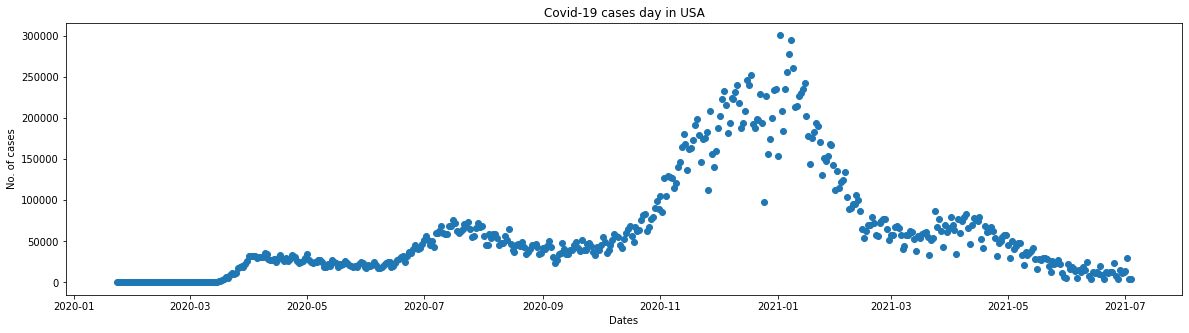

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(dfU2['ds'],dfU2['y'])
plt.title('Covid-19 cases day in USA')
plt.xlabel('Dates')
plt.ylabel('No. of cases')

In [75]:
from fbprophet import Prophet
modelu2= Prophet(changepoint_prior_scale=0.5, growth='logistic')      #growth is kept logistic so that the graph can be consistent along with changing points
modelu2.fit(dfU2)
x_u2= modelu2.make_future_dataframe(periods=35,freq='D')
x_u2['floor']=0                                                         #here floor value is provided so as to avoid negative value predictions
x_u2['cap']=350000                                                      #here cap values are provided because it's necessary for logistic growth 
forecast_u2=modelu2.predict(x_u2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


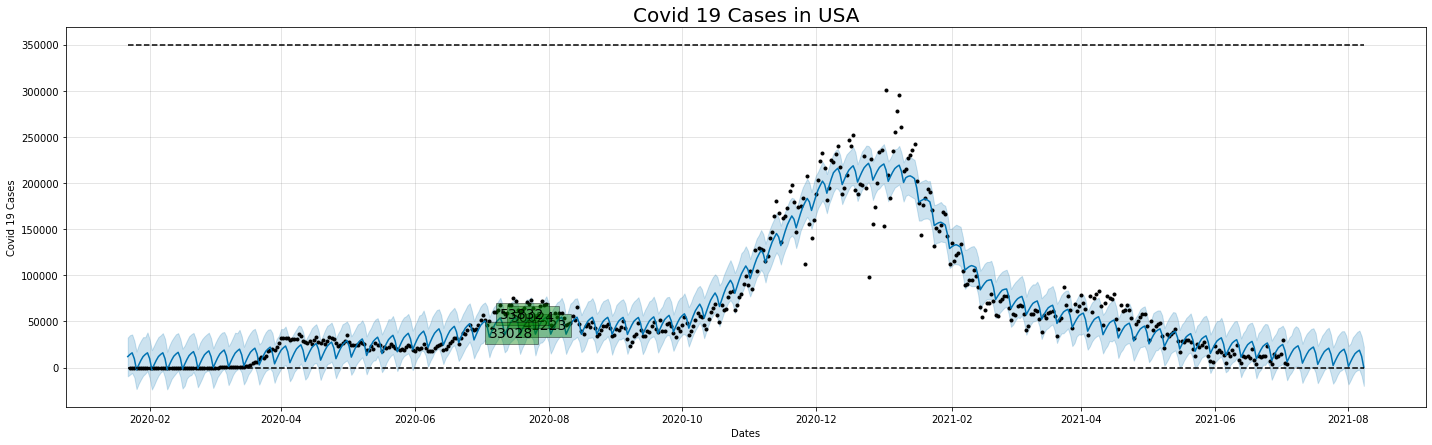

In [76]:
modelu2.plot(forecast_u2,figsize=(20,6), xlabel='Dates', ylabel='Covid 19 Cases');
plt.title('Covid 19 Cases in USA', size=20)
#Extra lines for number
forecast_plus_u2=forecast_u2.loc[[180,175,170,165]]
for a,b in zip(forecast_plus_u2['ds'], forecast_plus_u2['yhat']):
  plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

In [77]:
# For total cases in July month
rms(forecast_u2)

1376213

<b>Q) What is the prediction for the month of July 2021?<br></b>
<u>Ans-</u> The number of new cases will steadily decline flattening the curve for the month of July with total of: 299998

In [78]:
dfU3=dfU[['date','new_vaccinations']]
dfU3['date']=pd.to_datetime(dfU3['date'])
dfU3=dfU3.rename(columns={dfU3.columns[0]:'ds', dfU3.columns[1]:'y'})
dfU3['floor']=0                                                         #here floor value is provided so as to avoid negative value predictions
dfU3['cap']=5500000                                                     #here cap values are provided because it's necessary for logistic growth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'New Vaccinations(scale in million')

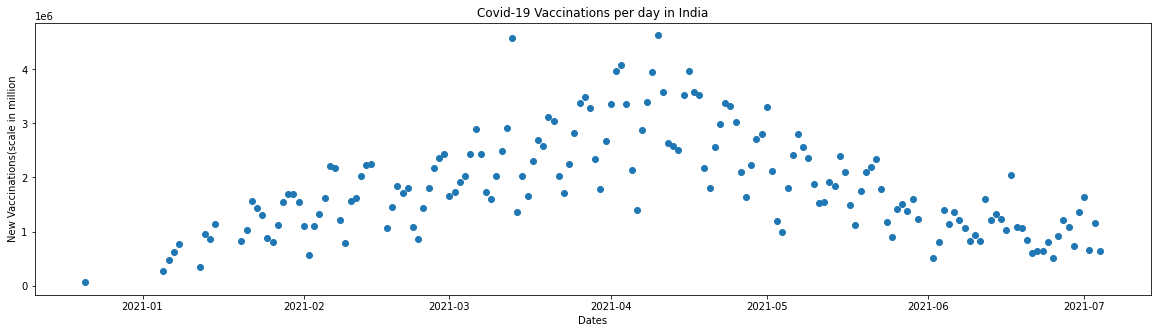

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(dfU3['ds'],dfU3['y'])
plt.title('Covid-19 Vaccinations per day in India')
plt.xlabel('Dates')
plt.ylabel('New Vaccinations(scale in million')

In [80]:
from fbprophet import Prophet
modelu3= Prophet(changepoint_prior_scale=0.9, growth='logistic')             #growth is kept logistic so that the graph can be consistent along with changing points
modelu3.fit(dfU3)
x_u3= modelu3.make_future_dataframe(periods=35,freq='D')
x_u3['floor']=0                                                              #here floor value is provided so as to avoid negative value predictions
x_u3['cap']=5500000                                                         #here cap values are provided because it's necessary for logistic growth 
forecast_u3=modelu3.predict(x_u3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


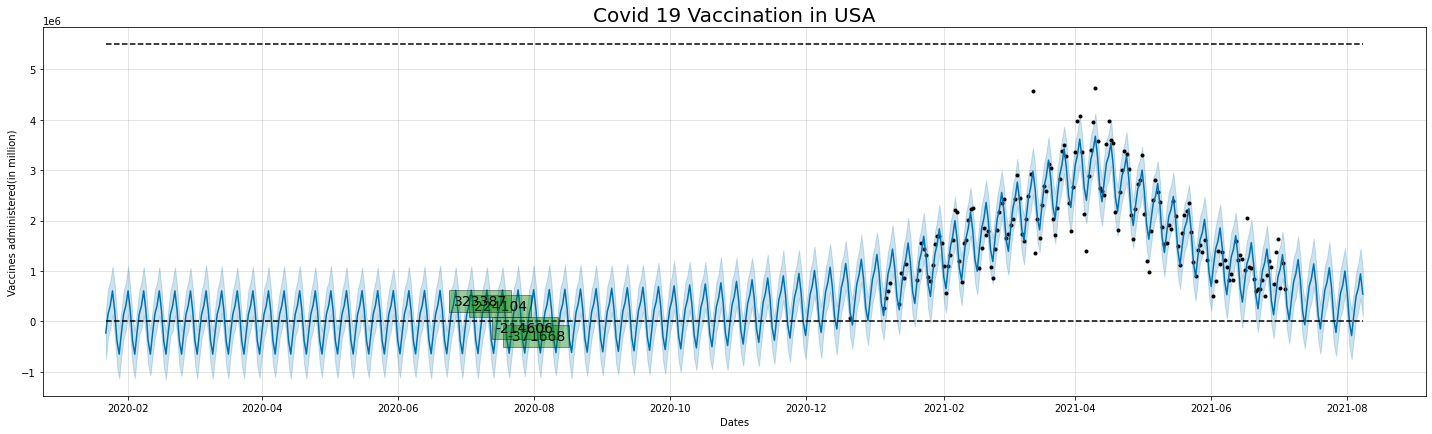

In [81]:
modelu3.plot(forecast_u3,figsize=(20,6), xlabel='Dates', ylabel='Vaccines administered(in million)');
plt.title('Covid 19 Vaccination in USA', size=20)
#Extra lines for number
forecast_plus_u3=forecast_u3.loc[[180,175,165,156]]
for a,b in zip(forecast_plus_u3['ds'], forecast_plus_u3['yhat']):
  plt.text(a, b, str(int(b)),bbox=dict(facecolor='green', alpha=0.4), fontsize=14)

In [82]:
# For vaccination in July month
rms(forecast_u3)

12471238

<b>Q) What is the prediction of vaccinations for the month of July 2021?<br></b>
<u>Ans-</u> The new vaccinations for the month of July shows a mixed pattern of rise and fall with total of: 18943955

**Overview :**<br><hr>
**Forecasted Indian figures for july :**
* Cases:		 518324
* Deaths:		 23746
* Vaccinations:	 191196759


**Forecasted USA figures for july:**
* Cases:		 299998
* Deaths:		 13480
* Vaccinations:	 18686788